In [2]:
import cga_utils
import prompt_versions_g3n
import pandas as pd
%load_ext autoreload
%autoreload 2

In [3]:
from langchain.globals import set_llm_cache
from langchain_community.cache import SQLiteCache

set_llm_cache(SQLiteCache(database_path=".langchain.v18_gemma3n.db"))

In [4]:
from langchain_community.chat_models import ChatOllama
#llm = ChatOllama(model="qwen3:4b", temperature = 0.0, top_p = 1, repeat_penalty=1, presence_penalty=0, frequency_penalty=0)  # vagy bármely más elérhető Ollama model
llm = ChatOllama(model="gemma3n:e4b", temperature = 0.0, top_p = 1, repeat_penalty=1, presence_penalty=0, frequency_penalty=0, num_predict=400)  # vagy bármely más elérhető Ollama modell

In [6]:
import pandas as pd
messages1 = prompt_versions_g3n.prompt_versions['V18']

messages2 = prompt_versions_g3n.prompt_versions['V18'].copy()
messages2[-1] = ( messages2[-1][0],  messages2[-1][1] + " " )

messages3 = prompt_versions_g3n.prompt_versions['V18'].copy()
messages3[-1] = ( messages3[-1][0],  messages3[-1][1] + "  " )



In [7]:
#problematic_qids = list(pd.read_csv('res/e37.csv').query('error_code == "selection_error" and calc_pattern == "(#+#)/#"')['qid'])
#df = pd.read_csv('res/e38_19.csv')
#problematic_qids = list(df[df["question"].str.contains("percentage change")]['qid'])

#res = cga_utils.execute_datset_predictions(llm, messages, problematic_qids)
res1 = cga_utils.execute_dataset_predictions(llm, messages1)

1771424094.0944467


0it [00:00, ?it/s]

b2786c1a-37de-4120-b03c-32bf5c81f157
What was the change in the amount for Appliances in 2019 from 2018?[Error]invalid syntax (<string>, line 27)
[Error]invalid syntax (<string>, line 27)
 failure: [Error]invalid syntax (<string>, line 27) good answer:  -94  14.488s
<< 680-774 || [] || [680.0, 774.0] || False >>
fe11f001-3bfe-4089-8108-412676f0a780
What was the percentage change in the amount for Appliances in 2019 from 2018? Success: -12.14 5.828s
<< (680-774)/774 || [680.0, 774.0, -12.144702842377262] || [680.0, 774.0, 774.0] || True >>
5103aed0-b4e8-4fae-bf78-e2c9f4ba84cf
What is the difference between the domestic and international discount rates as at September 30, 2019? failure: 0.6 good answer:  2.1  4.989s
<< 4.00 - 1.90  || [4.0, 3.4, 0.6000000000000001] || [4.0, 1.9] || False >>
4dc8be43-d8d9-4b08-9ffd-9c19012361ce
What is the year on year percentage change in domestic discount rate between 2018 and 2019? failure: 6.67 good answer:  6.67  5.034s
<< (4.00 - 3.75)/3.75  || [4.0

In [10]:
annotated_results1 = cga_utils.annotate_results(res1)
cga_utils.calc_overall_em(annotated_results1)

Annotaion warning:  unmatched ')' (<unknown>, line 12)
Annotaion warning:  unmatched ')' (<unknown>, line 4)


0.4164989939637827

In [13]:
res2 = cga_utils.execute_dataset_predictions(llm, messages2)

1771428458.5805857


0it [00:00, ?it/s]

b2786c1a-37de-4120-b03c-32bf5c81f157
What was the change in the amount for Appliances in 2019 from 2018?[Error]invalid syntax (<string>, line 27)
[Error]invalid syntax (<string>, line 27)
 failure: [Error]invalid syntax (<string>, line 27) good answer:  -94  0.004s
<< 680-774 || [] || [680.0, 774.0] || False >>
fe11f001-3bfe-4089-8108-412676f0a780
What was the percentage change in the amount for Appliances in 2019 from 2018? Success: -12.14 0.004s
<< (680-774)/774 || [680.0, 774.0, -12.144702842377262] || [680.0, 774.0, 774.0] || True >>
5103aed0-b4e8-4fae-bf78-e2c9f4ba84cf
What is the difference between the domestic and international discount rates as at September 30, 2019? failure: 0.6 good answer:  2.1  0.002s
<< 4.00 - 1.90  || [4.0, 3.4, 0.6000000000000001] || [4.0, 1.9] || False >>
4dc8be43-d8d9-4b08-9ffd-9c19012361ce
What is the year on year percentage change in domestic discount rate between 2018 and 2019? failure: 6.67 good answer:  6.67  0.002s
<< (4.00 - 3.75)/3.75  || [4.0,

In [15]:
res3 = cga_utils.execute_dataset_predictions(llm, messages3)

1771433905.7671752


0it [00:00, ?it/s]

b2786c1a-37de-4120-b03c-32bf5c81f157
What was the change in the amount for Appliances in 2019 from 2018?

KeyboardInterrupt: 

In [17]:
annotated_results1 = cga_utils.annotate_results(res1)
annotated_results2 = cga_utils.annotate_results(res2)
#annotated_results3 = cga_utils.annotate_results(res3)
#annotated_results.to_csv('res/Ollama_2_gemma3n_e4b_code_values_v11_m1.csv')#
#cga_utils.calc_overall_value_match(annotated_results)
em1 = cga_utils.calc_overall_em(annotated_results1)
em2 = cga_utils.calc_overall_em(annotated_results2)
#em3 = cga_utils.calc_overall_em(annotated_results3)

#em = (em1+em2+em3 )/3 
em1, em2

Annotaion warning:  unmatched ')' (<unknown>, line 12)
Annotaion warning:  unmatched ')' (<unknown>, line 4)
Annotaion warning:  unmatched ')' (<unknown>, line 12)
Annotaion warning:  unmatched ')' (<unknown>, line 4)


(0.4164989939637827, 0.40643863179074446)

In [8]:
annotated_results = cga_utils.annotate_results(res)
#annotated_results.to_csv('res/Ollama_2_gemma3n_e4b_code_values_v11_m1.csv')
cga_utils.calc_overall_em(annotated_results)

Annotaion warning:  invalid decimal literal (<unknown>, line 6)


0.42655935613682094

In [12]:
annotated_results1.to_csv('res/gemma3n_v18.csv')

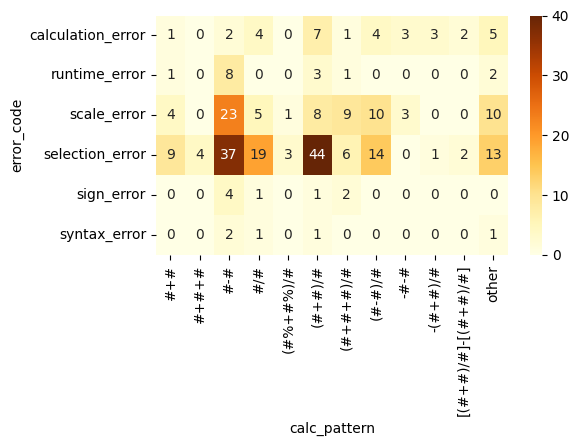

285

In [14]:
df = annotated_results.query('error_code != "none"')
cga_utils.crosstab_heatmap(df, 'error_code', 'calc_pattern', 40,0,3) 
len(df)